** Задание 1. Загрузка и анализ данных**

1.1 Загрузите набор данных NSL-KDD из репозитория GitHub

1.2 Импортируйте его в среду Python с помощью библиотеки pandas.


In [ ]:
import pandas as pd  # Импортируем библиотеку pandas, которая предоставляет инструменты для работы с данными в табличном формате.
url = "/content/KDDTrain .csv"  # Задаем переменную 'url', которая содержит путь к файлу CSV
data = pd.read_csv(url)  # Используем функцию read_csv из библиотеки pandas для чтения данных из указанного CSV файла и сохраняем их в переменной 'data' в виде DataFrame.

1.3 Исследуйте структуру данных:

1.4 Выведите первые 5 строк датасета.


In [ ]:
print(data.head())

   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...  0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...  0.07  0.07   

   0.17.1  0.25  0.26  0.27  0.05  0.28   normal  20  
0    0.88  0.00  0.00  0.00   0.0  0.00   normal  15  
1    0.00  0.00  1.00  1.00   0.0  0.00  neptune  19  
2    0.03  0.04  0.03  0.01   0.0  0.01   normal  21  
3    0.00  0.00  0.00  0.00   0.0  0.00   normal  21  
4    0.00  0.00  0.00  0.00   1.0  1.00  neptune  21  

[5 rows x 43 columns]


1.5 Определите количество строк и столбцов.


In [ ]:
num_rows, num_columns = data.shape
print(f"Количество строк: {num_rows}, Количество столбцов: {num_columns}")
# атрибут shape, который возвращает кортеж с двумя значениями: первое значение — это количество строк, а второе — количество столбцов в DataFrame.

Количество строк: 125972, Количество столбцов: 43


1.6 Определите типы признаков (числовые, категориальные).


In [ ]:
feature_types = data.dtypes # Получаем типы данных для каждого столбца в DataFrame 'data' и сохраняем их в переменной 'feature_types'.
print(feature_types)

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.19        float64
0.20        float64
0.21        float64
0.22        float64
1           float64
0.23        float64
0.24        float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.25        float64
0.26        float64
0.27        float64
0.05        float64
0.28        float64
normal       object
20            int64
dtype: object


1.7 Проверьте наличие пропущенных значений.

In [ ]:
missing_values = data.isnull().sum() # Проверяем, есть ли пропущенные значения в каждом столбце DataFrame 'data', и суммируем их.
print("Пропущенные значения в каждом столбце:")
print(missing_values[missing_values > 0])

Пропущенные значения в каждом столбце:
Series([], dtype: int64)


**Задание 2. Визуализация данных**

1. Постройте гистограммы для анализа распределения числовых признаков

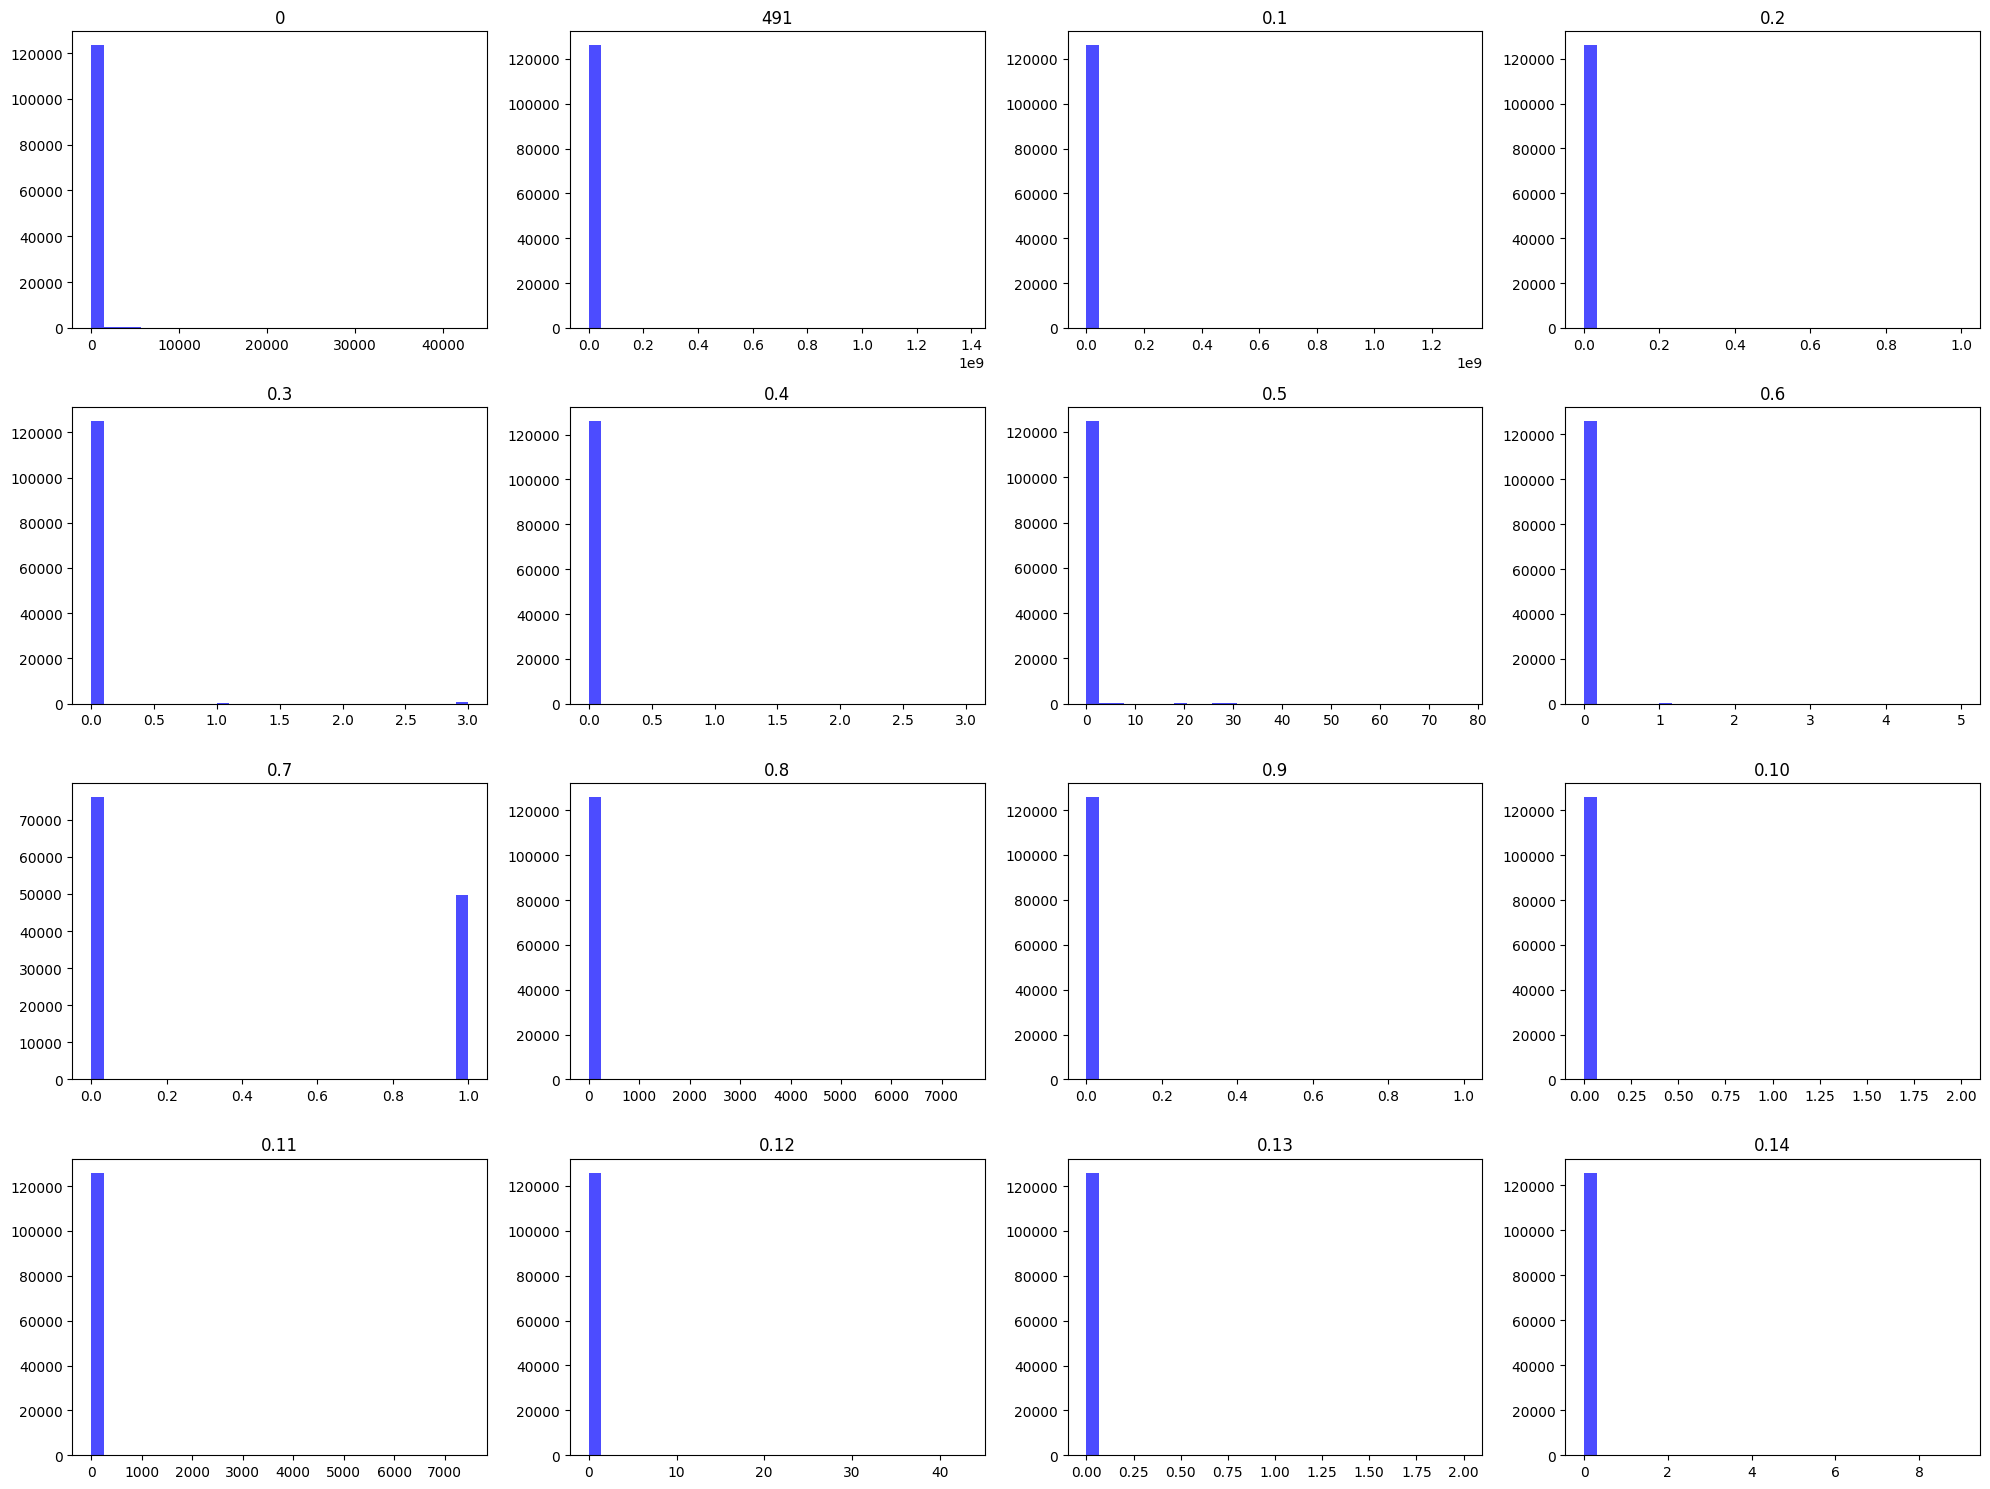

In [ ]:
import matplotlib.pyplot as plt # Импортируем библиотеку matplotlib для визуализации данных.
import seaborn as sns # Импортируем библиотеку seaborn для создания статистических графиков.
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns # Выбираем все числовые столбцы (целочисленные и с плавающей запятой) из DataFrame 'data'.
num_plots = min(len(numeric_columns), 16) # Определяем количество графиков, которое будет построено (максимум 16).
plt.figure(figsize=(20, 15)) # Создаем фигуру для графиков с заданными размерами.
for i, column in enumerate(numeric_columns[:num_plots]): # Проходим по каждому числовому столбц
    plt.subplot(4, 4, i + 1) # Создаем подграфик в сетке 4x4 для каждого столбца.
    plt.hist(data[column], bins=30, color='blue', alpha=0.7)  # Строим гистограмму для текущего столбца с 30 корзинами ( bins=30, что означает, что диапазон значений для текущего столбца будет разбит на 30 равных интервалов.)
    plt.title(column) # Устанавливаем заголовок для текущего графика.
plt.tight_layout() # Автоматически настраиваем параметры подграфиков для лучшего отображения.
plt.show() # Отображаем все построенные графики.

2. Создайте диаграммы рассеяния для выявления взаимосвязей между признаками.

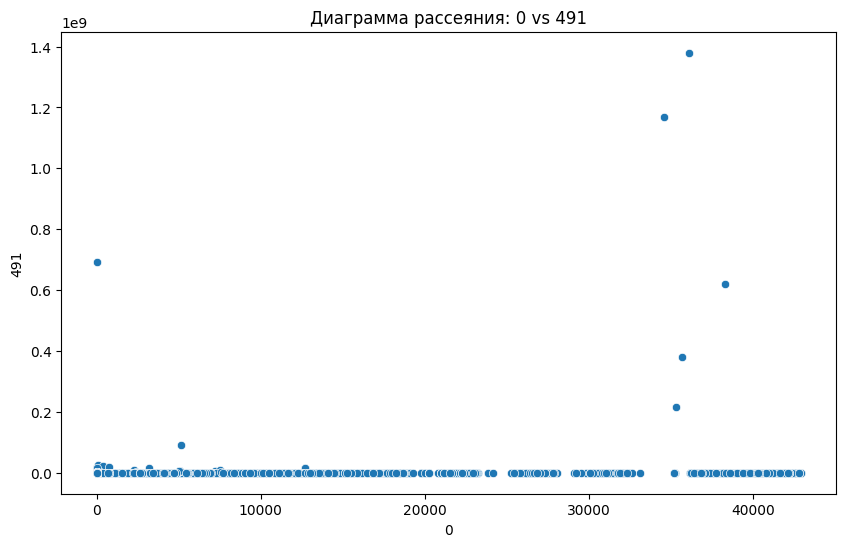

In [ ]:
# Импортируем необходимые библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем размер графика
plt.figure(figsize=(10, 6))

# Создаем диаграмму рассеяния, используя два числовых столбца из данных
sns.scatterplot(data=data, x=numeric_columns[0], y=numeric_columns[1])

# Добавляем заголовок к графику, чтобы указать, какие переменные сравниваются
plt.title(f'Диаграмма рассеяния: {numeric_columns[0]} vs {numeric_columns[1]}')

# Отображаем график на экране
plt.show()

3. Постройте тепловую карту корреляций для выявления зависимостей между
числовыми переменными.

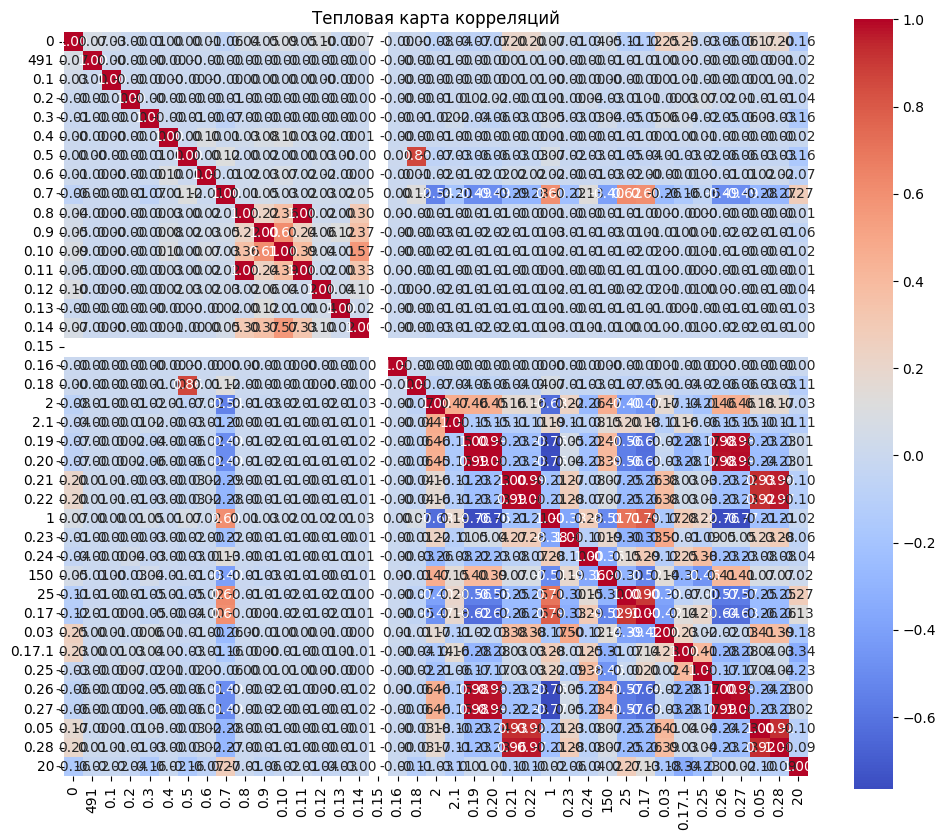

In [ ]:

# Устанавливаем размер фигуры для тепловой карты
plt.figure(figsize=(12, 10))

# Вычисляем матрицу корреляций для числовых столбцов в данных
correlation_matrix = data[numeric_columns].corr()

# Строим тепловую карту с аннотациями значений корреляции
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# annot=True: параметр включает отображение значений коэффициентов корреляции непосредственно на тепловой карте
# fmt=".2f": означает, что коэффициенты корреляции будут отображаться как числа с плавающей запятой с двумя знаками после запятой.
# Палитра 'coolwarm' переходит от холодных цветов (например, синего) к теплым (например, красному)

# Устанавливаем заголовок для графика
plt.title('Тепловая карта корреляций')

# Отображаем график
plt.show()

**Задание 3. Предобработка данных**

1. Обработка пропущенных значений (если имеются, замените средним или наиболее
частым значением).


In [ ]:
for column in data.columns:
    if data[column].isnull().any():
        if data[column].dtype == 'object':  # категориальный признак
            data[column].fillna(data[column].mode()[0], inplace=True)  # Замена на наиболее частое значение
        else:  # числовой признак
            data[column].fillna(data[column].mean(), inplace=True)  # Замена на среднее значение

2. Кодирование категориальных признаков:
Label Encoding – для упорядоченных категорий.
One-Hot Encoding – для неупорядоченных категорий (например, протокол).


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Определение категориальных признаков
# Выбираем столбцы с категориальными данными (тип 'object' или 'category') и сохраняем их в список
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Категориальные признаки: ")
print(categorical_columns)

# Проходим по всем категориальным признакам
for column in categorical_columns:
    # Если столбец является неупорядоченной категорией (тип 'object')
    if data[column].dtype == 'object':
        # Применяем One-Hot Encoding для преобразования категорий в бинарные признаки
        data = pd.get_dummies(data, columns=[column], drop_first=True)  # One-Hot Encoding
    else:  # Если столбец является упорядоченной категорией
        label_encoder = LabelEncoder()
        # Применяем Label Encoding для преобразования категорий в числовые значения
        data[column] = label_encoder.fit_transform(data[column])  # Label Encoding

Категориальные признаки: 
['tcp', 'ftp_data', 'SF', 'normal']


One-Hot Encoding

One-Hot Encoding — это метод кодирования категориальных переменных, который преобразует каждую категорию в отдельный бинарный признак. Например, если у вас есть категориальный признак "Цвет" с возможными значениями "Красный", "Зеленый" и "Синий", One-Hot Encoding создаст три новых бинарных признака: "Цвет_Красный", "Цвет_Зеленый" и "Цвет_Синий". Если объект имеет значение "Красный", то "Цвет_Красный" будет равно 1, а остальные два признака будут равны 0. Этот метод помогает избежать проблем с порядком категорий и делает данные совместимыми с алгоритмами машинного обучения, которые требуют числового ввода.

Label Encoding

Label Encoding — это другой метод кодирования категориальных переменных, который присваивает каждой категории уникальное целое число. Например, для того же признака "Цвет" с категориями "Красный", "Зеленый" и "Синий" можно присвоить значения 0, 1 и 2 соответственно. Этот метод подходит для упорядоченных категорий, где порядок имеет значение, но может привести к проблемам, если категории не имеют естественного порядка, так как алгоритмы могут интерпретировать числовые значения как имеющие определенные отношения.

3. Нормализация числовых данных:
Min-Max Scaling (приведение значений к диапазону [0,1]).
Standardization (преобразование к среднему 0 и стандартному отклонению 1).

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Определение числовых признаков
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Min-Max Scaling
# MinMaxScaler нормализует данные, приводя их к диапазону от 0 до 1.
# Это делается путем вычитания минимального значения и деления на диапазон (максимальное значение минус минимальное).
min_max_scaler = MinMaxScaler()
data[numeric_columns] = min_max_scaler.fit_transform(data[numeric_columns])

# Standardization
# StandardScaler стандартизирует данные, вычитая среднее значение и деля на стандартное отклонение, чтобы получить распределение с нулевым средним и единичной дисперсией.
standard_scaler = StandardScaler()
data[numeric_columns] = standard_scaler.fit_transform(data[numeric_columns])

**Задание 4. Попробуйте провести анализ на тестовом наборе данных NSL-KDD.**

1. Выполните балансировку классов с помощью техники oversampling или
undersampling.


In [ ]:
from imblearn.over_sampling import RandomOverSampler # создает новые образцы, выбирая случайные примеры из меньшинственного класса с возвращением
from imblearn.under_sampling import RandomUnderSampler # cлучайным образом выбирает и удаляет примеры из большинства класса, чтобы сбалансировать количество примеров между классами
# RandomOverSampler и RandomUnderSampler — это классы из библиотеки imblearn, которые используются для обработки несбалансированных наборов данных.
# Несбалансированные данные возникают, когда количество примеров в разных классах сильно различается, что может негативно сказаться на производительности моделей машинного обучения.
from collections import Counter # позволяет подсчитывать количество экземпляров каждого класса в наборе данных.

In [ ]:

X = data.iloc[:, :-1]  # выбираем все столбцы, кроме последнего, чтобы использовать их в качестве признаков
y = data.iloc[:, -1]   # последний столбец используется как целевая переменная, которую мы хотим предсказать.

# Проверка распределения классов до балансировки
print("Распределение классов до балансировки:", Counter(y))

# Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto') # RandomOverSampler используется для увеличения количества экземпляров меньшинства в целевой переменной.
X_resampled, y_resampled = oversampler.fit_resample(X, y) # создает новые выборки, увеличивая количество экземпляров меньшинства.

print("Распределение классов после oversampling:", Counter(y_resampled))

# Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto') # RandomUnderSampler используется для уменьшения количества экземпляров большинства в целевой переменной.
X_resampled, y_resampled = undersampler.fit_resample(X, y) # создает новые выборки, уменьшая количество экземпляров большинства.

print("Распределение классов после undersampling:", Counter(y_resampled))

Распределение классов до балансировки: Counter({False: 125952, True: 20})
Распределение классов после oversampling: Counter({False: 125952, True: 125952})
Распределение классов после undersampling: Counter({False: 20, True: 20})
